# ME5413 Homework 3: Planning

## Task 0: Load the Map

In [4]:
!pip install numpy
!pip install matplotlib
!pip install imageio

   ---------------------------------------- 0.0/12.9 MB ? eta -:--:--
   ---------------------------------------- 12.9/12.9 MB 80.8 MB/s eta 0:00:00
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ---------------------------------------- 8.1/8.1 MB 83.8 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   ---------------------------------------- 2.2/2.2 MB 129.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.6 MB ? eta -:--:--
   ---------------------------------------- 2.6/2.6 MB 76.2 MB/s eta 0:00:00


In [5]:
import numpy as np
import imageio
import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\10174\AppData\Local\Temp\ipykernel_31240\187924686.py:2: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  floor_plan = imageio.imread('./map/vivocity.png')
C:\Users\10174\AppData\Local\Temp\ipykernel_31240\187924686.py:3: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  grid_map_img = imageio.imread('./map/vivocity_freespace.png')


Size of the map: (1000, 1000)
Occupied Cells: 823039
Free Cells: 176961


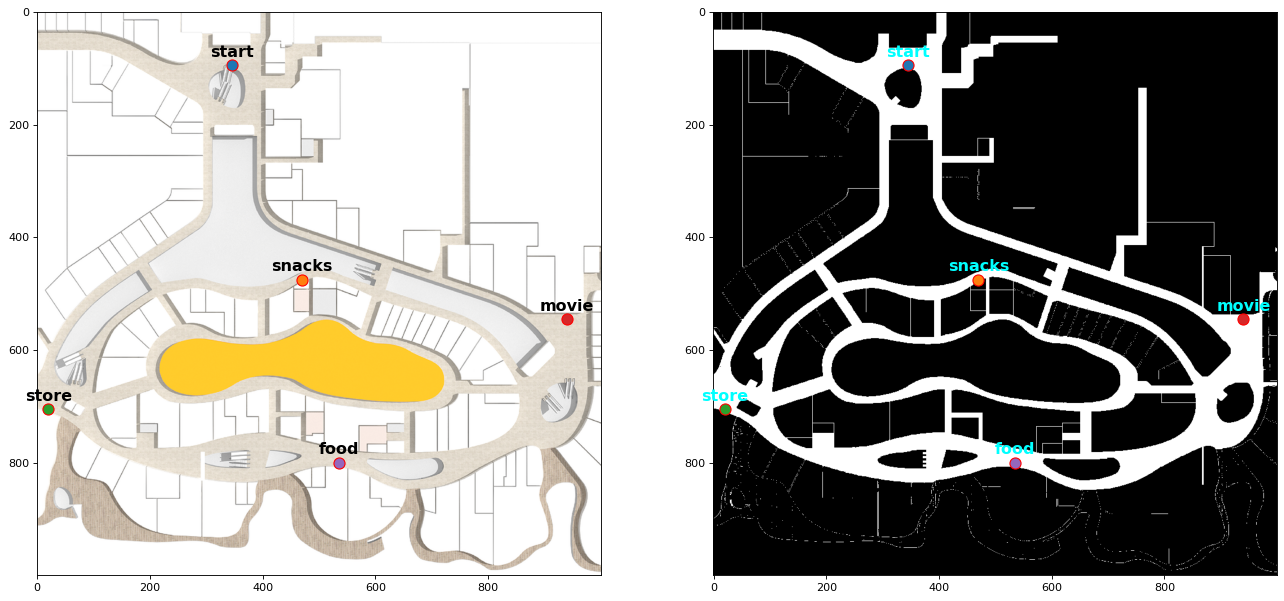

Cell start is free: True
Cell snacks is free: True
Cell store is free: True
Cell movie is free: True
Cell food is free: True


In [6]:
# Load the map
floor_plan = imageio.imread('./map/vivocity.png')
grid_map_img = imageio.imread('./map/vivocity_freespace.png')
grid_map = grid_map_img.transpose()
print("Size of the map:", grid_map.shape)
print("Occupied Cells:", np.count_nonzero(grid_map == 0))
print("Free Cells:", np.count_nonzero(grid_map == 255))

# Map resolution (Constant)
MAP_RES = 0.2 # each cell represents a 0.2m x 0.2m square in reality

# Locations on the map
locations = {'start':  [345, 95],    # Start from the level 2 Escalator
             'snacks': [470, 475],   # Garrett Popcorn
             'store':  [20, 705],    # DJI Store
             'movie':  [940, 545],   # Golden Village
             'food':   [535, 800],   # PUTIEN
            }

# A helper function to mark the locations on the map
def plot_locations(locations: dict, color: 'str'='black'):
    for key, value in locations.items():
        plt.plot(locations[key][0], locations[key][1], marker="o", markersize=10, markeredgecolor="red")
        plt.text(locations[key][0], locations[key][1]-15, s=key, fontsize='x-large', fontweight='bold', c=color, ha='center')
    return

# Plot the locaitons on the map 
plt.figure(figsize=(20, 10), dpi=80)
plt.subplot(1,2,1)
plt.imshow(floor_plan)
plot_locations(locations)
plt.subplot(1,2,2)
plt.imshow(grid_map_img, cmap='gray')
plot_locations(locations, color='cyan')
plt.show()

# Check if the designated locations are free
for key, value in locations.items():
    print(f"Cell {key} is free: {grid_map[value[0], value[1]] == 255}")

## Task 1_A*

C:\Users\10174\AppData\Local\Temp\ipykernel_31240\2098645601.py:8: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  floor_plan = imageio.imread('./map/vivocity.png')
C:\Users\10174\AppData\Local\Temp\ipykernel_31240\2098645601.py:9: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  grid_map_img = imageio.imread('./map/vivocity_freespace.png')


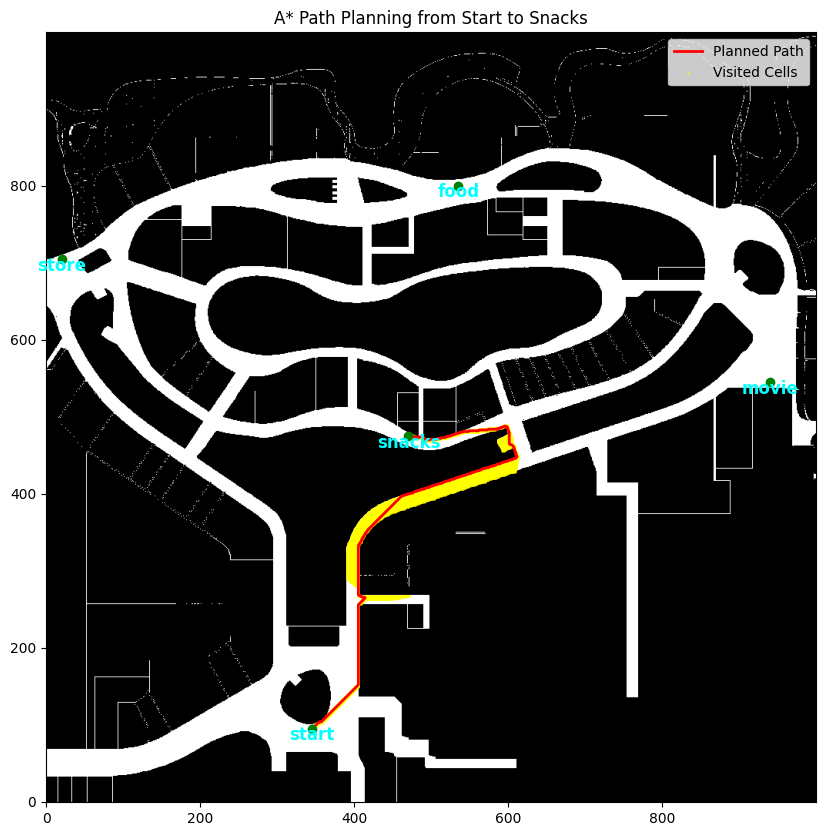

{'Total distance (m)': 143.5119999999999,
 'Total visited cells': 6346,
 'Algorithm runtime (s)': 0.9179549217224121}

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import imageio
import heapq
import time

# 加载地图
floor_plan = imageio.imread('./map/vivocity.png')
grid_map_img = imageio.imread('./map/vivocity_freespace.png')
grid_map = grid_map_img.transpose()

# 地图分辨率
MAP_RES = 0.2  # 每个单元格代表0.2m x 0.2m

# 关键位置
locations = {'start': [345, 95],
             'snacks': [470, 475],
             'store': [20, 705],
             'movie': [940, 545],
             'food': [535, 800]}

# A*算法实现
class Node:
    def __init__(self, position, parent=None):
        self.position = position
        self.parent = parent
        self.g = self.h = self.f = 0

    def __lt__(self, other):
        return self.f < other.f

def heuristic(a, b):
    # 欧几里得距离
    return np.linalg.norm(np.array(a) - np.array(b))

def astar(grid, start, end):
    start_node = Node(start)
    end_node = Node(end)
    
    open_set = []
    closed_set = set()
    heapq.heappush(open_set, start_node)
    
    visited_cells = set()
    visited_cells.add(tuple(start))

    moves = [(-1, 0), (1, 0), (0, -1), (0, 1), (-1, -1), (-1, 1), (1, -1), (1, 1)]
    costs = [0.2, 0.2, 0.2, 0.2, 0.282, 0.282, 0.282, 0.282]

    while open_set:
        current_node = heapq.heappop(open_set)
        closed_set.add(tuple(current_node.position))

        if current_node.position == end_node.position:
            path = []
            distance = current_node.g
            while current_node:
                path.append(current_node.position)
                current_node = current_node.parent
            return path[::-1], distance, visited_cells

        for move, cost in zip(moves, costs):
            node_position = [current_node.position[0] + move[0], current_node.position[1] + move[1]]
            if node_position[0] < 0 or node_position[1] < 0 or node_position[0] >= grid.shape[0] or node_position[1] >= grid.shape[1]:
                continue
            if grid[node_position[0], node_position[1]] == 0:
                continue
            if tuple(node_position) in closed_set:
                continue

            neighbor = Node(node_position, current_node)
            neighbor.g = current_node.g + cost
            neighbor.h = heuristic(node_position, end_node.position)
            neighbor.f = neighbor.g + neighbor.h

            if not any(node.position == neighbor.position and node.g <= neighbor.g for node in open_set):
                heapq.heappush(open_set, neighbor)
                visited_cells.add(tuple(node_position))

    return None, float('inf'), visited_cells

# 运行算法并记录性能指标
start_time = time.time()
path, distance, visited_cells = astar(grid_map, locations['start'], locations['snacks'])
end_time = time.time()

# 可视化路径
path = np.array(path)

plt.figure(figsize=(10, 10))
plt.imshow(grid_map_img, cmap='gray')
plt.plot(path[:, 0], path[:, 1], color='red', linewidth=2, label='Planned Path')
plt.scatter(*zip(*visited_cells), s=1, color='yellow', alpha=0.5, label='Visited Cells')
for loc, pos in locations.items():
    plt.plot(pos[0], pos[1], 'go')
    plt.text(pos[0], pos[1]-15, loc, fontsize=12, color='cyan', ha='center', fontweight='bold')
plt.legend()
plt.title('A* Path Planning from Start to Snacks')
plt.gca().invert_yaxis()
plt.show()

# 输出性能指标
performance_metrics = {
    "Total distance (m)": distance,
    "Total visited cells": len(visited_cells),
    "Algorithm runtime (s)": end_time - start_time
}

performance_metrics


## Task 1_Hybrid A*

C:\Users\10174\AppData\Local\Temp\ipykernel_31240\722894631.py:84: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  floor_plan = imageio.imread('./map/vivocity.png')
C:\Users\10174\AppData\Local\Temp\ipykernel_31240\722894631.py:85: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  grid_map_img = imageio.imread('./map/vivocity_freespace.png')


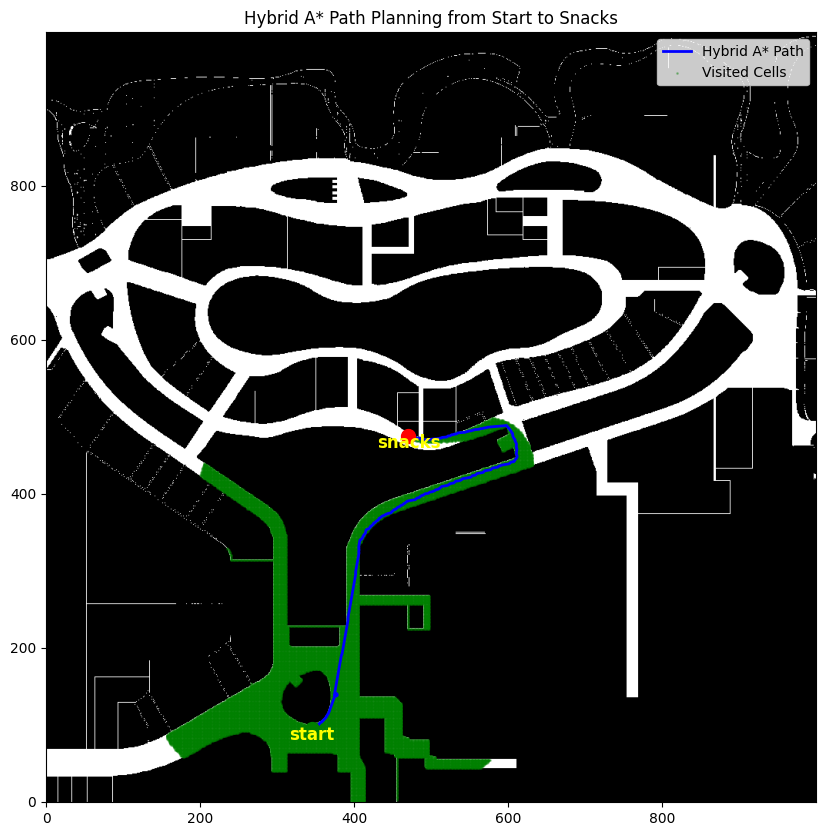

{'Total distance (m)': 138.6,
 'Total visited cells': 40412,
 'Algorithm runtime (s)': 842.7154159545898}

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import imageio
import heapq
import time
import math

# Hybrid A* 实现
class HybridNode:
    def __init__(self, position, theta, g, h, parent=None):
        self.position = position  # (x, y)
        self.theta = theta        # orientation
        self.g = g                # cost-to-come
        self.h = h                # heuristic (cost-to-go)
        self.f = g + h            # total cost
        self.parent = parent

    def __lt__(self, other):
        return self.f < other.f

def hybrid_heuristic(a, b):
    # 欧几里得距离作为启发式函数
    return np.linalg.norm(np.array(a) - np.array(b))

def is_free(grid, position):
    x, y = int(position[0]), int(position[1])
    if 0 <= x < grid.shape[0] and 0 <= y < grid.shape[1]:
        return grid[x, y] == 255
    return False

def hybrid_astar(grid, start, end, num_theta_cells=72):
    open_set = []
    closed_set = set()

    start_theta = 0
    theta_step = 2 * math.pi / num_theta_cells

    start_node = HybridNode(start, start_theta, 0, hybrid_heuristic(start, end))
    heapq.heappush(open_set, start_node)
    
    visited_cells = set()
    visited_cells.add((int(start[0]), int(start[1])))

    # Hybrid A* allows moves with steering angle constraints (simplified here)
    speed = 1
    steering_angles = [-35, 0, 35]  # degrees
    dt = 1

    while open_set:
        current_node = heapq.heappop(open_set)
        current_idx = (int(current_node.position[0]), int(current_node.position[1]), int(current_node.theta / theta_step))

        if current_idx in closed_set:
            continue
        closed_set.add(current_idx)

        if hybrid_heuristic(current_node.position, end) < 5:  # threshold for goal reaching
            path = []
            distance = current_node.g
            while current_node:
                path.append(current_node.position)
                current_node = current_node.parent
            return path[::-1], distance * MAP_RES, visited_cells

        for angle in steering_angles:
            theta = current_node.theta + np.deg2rad(angle)
            x = current_node.position[0] + speed * math.cos(theta) * dt
            y = current_node.position[1] + speed * math.sin(theta) * dt

            if not is_free(grid, (x, y)):
                continue

            neighbor_position = (x, y)
            g_cost = current_node.g + speed * dt
            h_cost = hybrid_heuristic(neighbor_position, end)
            neighbor_node = HybridNode(neighbor_position, theta, g_cost, h_cost, current_node)

            heapq.heappush(open_set, neighbor_node)
            visited_cells.add((int(x), int(y)))

    return None, float('inf'), visited_cells

# 加载地图 (假设用户已上传)
floor_plan = imageio.imread('./map/vivocity.png')
grid_map_img = imageio.imread('./map/vivocity_freespace.png')
grid_map = grid_map_img.transpose()

MAP_RES = 0.2
locations = {'start': [345, 95], 'snacks': [470, 475]}

# 运行Hybrid A*
start_time = time.time()
path, distance, visited_cells = hybrid_astar(grid_map, locations['start'], locations['snacks'])
end_time = time.time()

# 可视化路径
path = np.array(path)

plt.figure(figsize=(10, 10))
plt.imshow(grid_map_img, cmap='gray')
plt.plot(path[:, 0], path[:, 1], color='blue', linewidth=2, label='Hybrid A* Path')
plt.scatter(*zip(*visited_cells), s=1, color='green', alpha=0.3, label='Visited Cells')
plt.plot(locations['start'][0], locations['start'][1], 'go', markersize=10)
plt.plot(locations['snacks'][0], locations['snacks'][1], 'ro', markersize=10)
plt.text(locations['start'][0], locations['start'][1]-15, 'start', fontsize=12, color='yellow', ha='center', fontweight='bold')
plt.text(locations['snacks'][0], locations['snacks'][1]-15, 'snacks', fontsize=12, color='yellow', ha='center', fontweight='bold')
plt.legend()
plt.title('Hybrid A* Path Planning from Start to Snacks')
plt.gca().invert_yaxis()
plt.show()

# 输出性能指标
performance_metrics = {
    "Total distance (m)": distance,
    "Total visited cells": len(visited_cells),
    "Algorithm runtime (s)": end_time - start_time
}

performance_metrics


## Task 2

## Task 3